<a href="https://colab.research.google.com/github/AchmadRendiSetiawan/2300441100018/blob/main/Jurnal_Dataset_23_125_23_018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import sys

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Mencari Folder 'Original Images' di dalam Tugas_Dataset
# Kita mulai pencarian dari folder Tugas_Dataset agar lebih spesifik
search_root = '/content/drive/MyDrive/Tugas_Dataset'
data_dir = None

print(f"Sedang mencari folder 'Original Images' di dalam {search_root}...")

if not os.path.exists(search_root):
    print(f"ERROR: Folder '{search_root}' tidak ditemukan di Drive Anda.")
    print("Pastikan Anda sudah membuat folder 'Tugas_Dataset' dan mengupload datanya.")
else:
    # Deep Search: Mencari folder target dimanapun ia berada di dalam Tugas_Dataset
    for root, dirs, files in os.walk(search_root):
        for dir_name in dirs:
            if dir_name.lower().strip() == "original images":
                data_dir = os.path.join(root, dir_name)
                print(f"\n>>> DITEMUKAN! Lokasi dataset: {data_dir}")
                break
        if data_dir:
            break

if data_dir:
    print(f"Kelas Penyakit yang terdeteksi: {os.listdir(data_dir)}")
else:
    raise ValueError("Folder 'Original Images' TIDAK DITEMUKAN di dalam Tugas_Dataset. Cek kembali upload Anda.")

Mounted at /content/drive
Sedang mencari folder 'Original Images' di dalam /content/drive/MyDrive/Tugas_Dataset...

>>> DITEMUKAN! Lokasi dataset: /content/drive/MyDrive/Tugas_Dataset/Potato Disease Recognition Dataset/Original Images
Kelas Penyakit yang terdeteksi: ['Potato Brown Rot Disease', 'Potato Soft Rot Disease', 'Blackspot Bruising Disease', 'Healthy Potato', 'Potato Dry Rot Disease']


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

BATCH_SIZE = 32
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Pastikan data_dir sudah terisi dari Cell 1
if not data_dir:
    raise ValueError("Jalankan Cell 1 terlebih dahulu!")

print("Memuat Data Training...")
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

print("\nMemuat Data Validation...")
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print(f"\nLabel Kelas: {class_names}")

# Optimasi (PENTING: Karena baca dari Drive lambat, ini akan membantu mempercepat)
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Memuat Data Training...
Found 495 files belonging to 5 classes.
Using 396 files for training.

Memuat Data Validation...
Found 495 files belonging to 5 classes.
Using 99 files for validation.

Label Kelas: ['Blackspot Bruising Disease', 'Healthy Potato', 'Potato Brown Rot Disease', 'Potato Dry Rot Disease', 'Potato Soft Rot Disease']


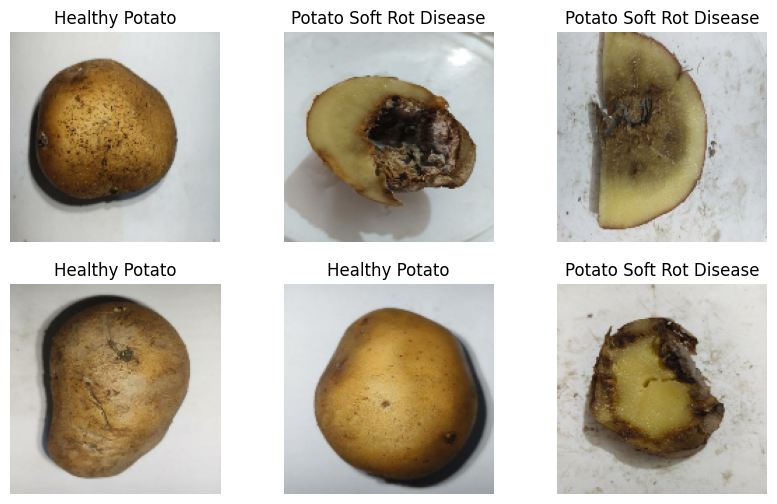

In [ ]:
plt.figure(figsize=(10, 6))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [ ]:
from tensorflow.keras import layers, models

# Augmentasi Otomatis (Hanya aktif saat training)
data_augmentation = models.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
])

# Arsitektur CNN
model = models.Sequential([
  # Input & Rescaling
  layers.Rescaling(1./255, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
  data_augmentation,

  # Convolution Layers
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  layers.Conv2D(128, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),

  # Dense Layers
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5), # Mencegah Overfitting
  layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,848,005 (7.05 MB)

 Trainable params: 1,848,005 (7.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
EPOCHS = 20
print("Mulai Training... (Epoch awal mungkin lambat karena caching)")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Mulai Training... (Epoch awal mungkin lambat karena caching)
Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2662 - loss: 1.5489 - val_accuracy: 0.3939 - val_loss: 1.3929
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4176 - loss: 1.4035 - val_accuracy: 0.3333 - val_loss: 1.3633
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5194 - loss: 1.2145 - val_accuracy: 0.5152 - val_loss: 1.1714
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4783 - loss: 1.2368 - val_accuracy: 0.5556 - val_loss: 1.0723
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5626 - loss: 1.0880 - val_accuracy: 0.5758 - val_loss: 0.8694
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5750 - loss: 0.9831 - val_accuracy: 0.6364 - val_loss: 0.8736
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5655 - loss: 1.0079 - val_accuracy: 0.5758 - val_loss: 0.9723
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accur

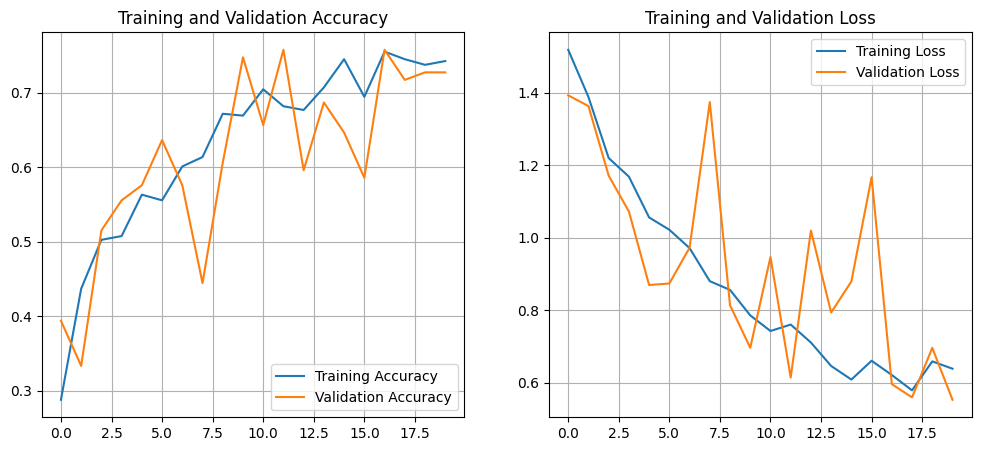

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid(True)

plt.show()

Menghitung Evaluasi pada Data Validasi...


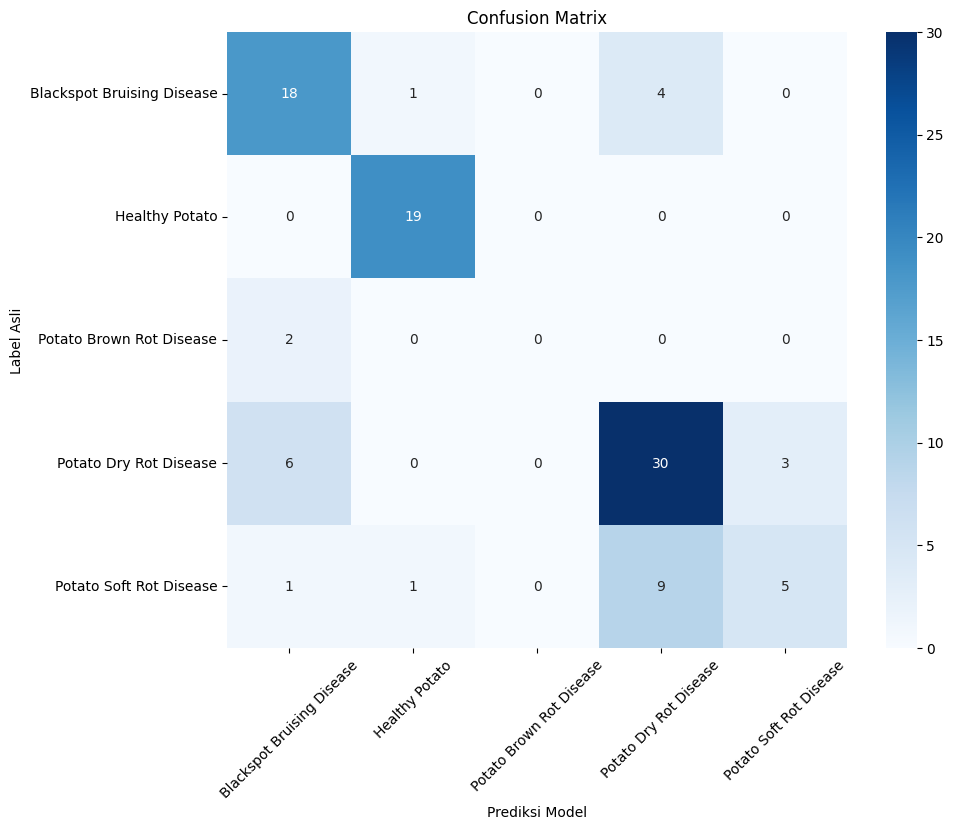


=== LAPORAN KLASIFIKASI ===
                            precision    recall  f1-score   support

Blackspot Bruising Disease       0.67      0.78      0.72        23
            Healthy Potato       0.90      1.00      0.95        19
  Potato Brown Rot Disease       0.00      0.00      0.00         2
    Potato Dry Rot Disease       0.70      0.77      0.73        39
   Potato Soft Rot Disease       0.62      0.31      0.42        16

                  accuracy                           0.73        99
                 macro avg       0.58      0.57      0.56        99
              weighted avg       0.70      0.73      0.71        99



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

print("Menghitung Evaluasi pada Data Validasi...")

# Ambil Label Asli dan Prediksi
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 1. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Prediksi Model')
plt.ylabel('Label Asli')
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

# 2. Laporan Klasifikasi Lengkap
print("\n=== LAPORAN KLASIFIKASI ===")
print(classification_report(y_true, y_pred, target_names=class_names))

Tes Prediksi 5 Gambar Acak...


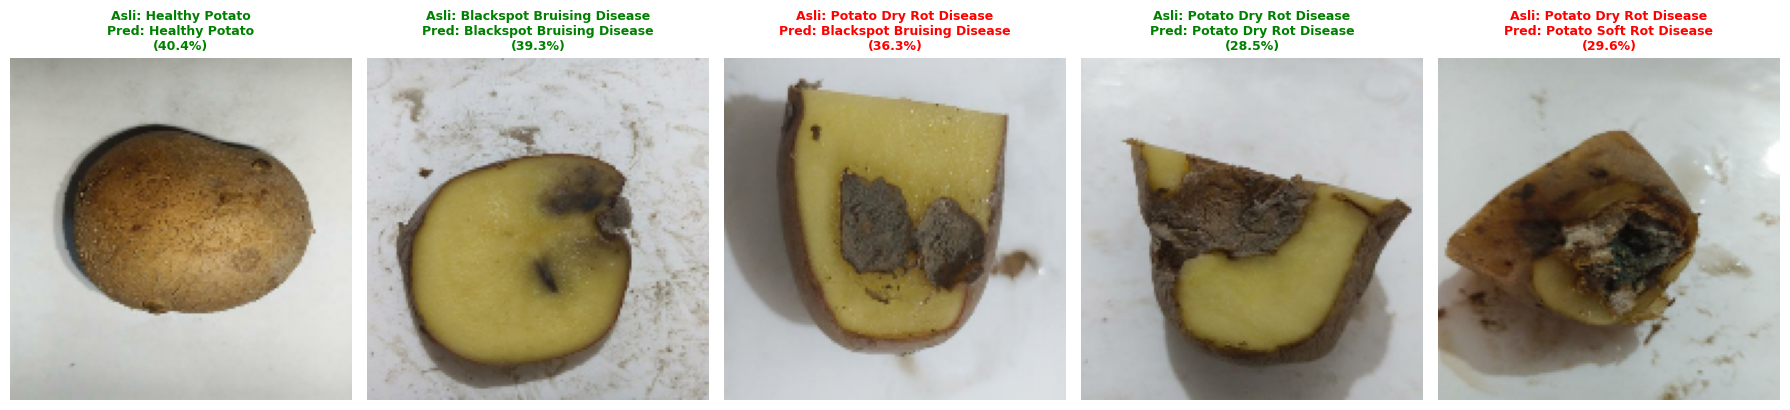

In [ ]:
print("Tes Prediksi 5 Gambar Acak...")

plt.figure(figsize=(18, 6))
image_batch, label_batch = next(iter(val_ds))
indices = np.random.choice(range(len(image_batch)), 5, replace=False)

for i, idx in enumerate(indices):
    img = image_batch[idx]
    label = label_batch[idx]

    img_array = tf.expand_dims(img, 0)
    predictions = model.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0])

    # Ambil nama kelas LENGKAP tanpa dipotong
    predicted_label = class_names[np.argmax(score)]
    actual_label = class_names[label]
    confidence = 100 * np.max(score)

    color = 'green' if predicted_label == actual_label else 'red'

    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(img.numpy().astype("uint8"))

    # Tampilkan teks lengkap dengan format rapi
    plt.title(f"Asli: {actual_label}\nPred: {predicted_label}\n({confidence:.1f}%)",
              color=color, fontsize=9, fontweight='bold')
    plt.axis("off")

plt.tight_layout()
plt.show()